## Scikit-learn을 이용한 선형회귀분석
### Diabetes 샘플 자료를 활용한 선형회귀분석

In [1]:
# 먼저 데이터분석에 필요한 python 패키지들을 불러온다.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
import numpy as np

### data에 대한 간략한 설명
* 독립변수는 X1 부터 X10까지이고, 종속변수는 target이다.
* 독립변수는 나이, 성별, 체중, 혈압, 혈청(6가지) 측정치를 의미한다.
* 종속변수 target은 각 환자의 1년 뒤 병(당뇨)의 진행상황을 뜻한다.
* 각 독립변수의 데이터는 mean: 0, squared length: 1로 정규화됐다.

In [2]:
diabetes = load_diabetes()

* 데이터의 구성이 어떻게 되어 있는지 테이블을 만들어서 확인한다.
* 테이블은 pandas 패키지를 이용해서 X축과 y축을 지정한 후 concat하여 만든다.
* 테이블에 있는 데이터를 5개만 확인해 본다.

In [3]:
dfX_diabetes = pd.DataFrame(diabetes.data, columns = ["X%d" % (i+1) for i in range(np.shape(diabetes.data)[1])]) # 독립변수를 지정한다.
dfy_diabetes = pd.DataFrame(diabetes.target, columns = ["target"]) # 종속변수를 지정한다.
df_diabetes0 = pd.concat([dfX_diabetes, dfy_diabetes], axis=1) # 독립변수와 종속변수의 값을 하나의 표로 합친다.
df_diabetes0.tail() # 표의 마지막 5개의 결과만 보여준다.

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,target
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0
441,-0.045472,-0.044642,-0.073030,-0.081414,0.083740,0.027809,0.173816,-0.039493,-0.004220,0.003064,57.0


* describe()를 사용해서 평균과 분산, 최저, 최고 값을 대략적으로 확인한다.

In [4]:
df_diabetes0.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


* 선형회귀모형을 분석하기 위해 sklearn에서 제공하는 LinearRegression을 불러온다.
* 각 독립변수의 계수(coefficient)값과 y절편(intercept)을 확인한다.

In [5]:
from sklearn.linear_model import LinearRegression
model_diabetes = LinearRegression().fit(diabetes.data, diabetes.target)
print(model_diabetes.coef_)
print(model_diabetes.intercept_)

[ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]
152.133484163


* 우리가 만든 diabetes 모델을 바탕으로 선형회귀예측을 한다.
* 모델의 정확성이 어느 정도 되는지 그래프를 만들어 확인해 본다.

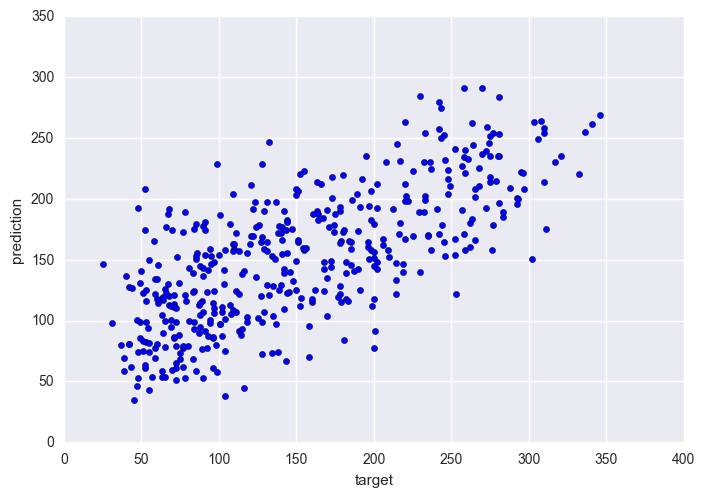

In [6]:
predictions = model_diabetes.predict(diabetes.data)
plt.scatter(diabetes.target, predictions)
plt.xlabel("target")
plt.ylabel("prediction")
plt.show()

* MAE(Mean absolute error)를 사용해서 모델의 정확성을 진단한다.
* 결과는 38.79 %
* 442명의 샘플을 통해서 이 정도의 결과를 보여준 것은 의미있는 결과라고 생각되며,
* 더욱 정확한 모델을 만들기 위해서는 추가적인 샘플조사가 필요하다.

In [7]:
mean_abs_error = (np.abs(((diabetes.target - predictions)/diabetes.target)*100)).mean()
print("MAE: %.2f%%" % (mean_abs_error))

MAE: 38.79%
